In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("C:/Users/vinay/Downloads/Train_dataset/open_eye/s0013_03594_0_1_1_1_0_01.png", cv2.IMREAD_GRAYSCALE)

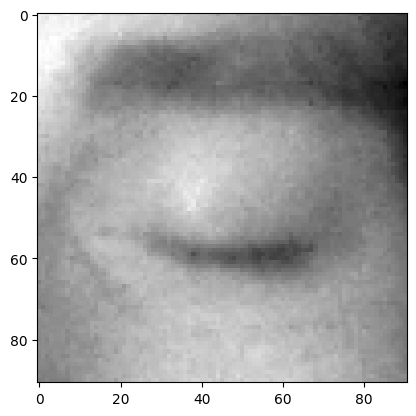

In [5]:
Datadirectory = "C:/Users/vinay/Downloads/Train_dataset"
Classes = ["closed_eye", "open_eye"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap= "gray")
        plt.show()
        break
    break

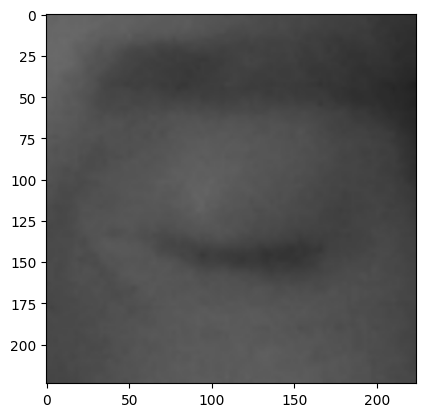

In [7]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

#Reading All the images and converting them into an array for data and labels

In [10]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

1254


In [16]:
import random
random.shuffle(training_Data)

In [18]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [20]:
X.shape

(1254, 224, 224, 3)

In [22]:
#normalizse the data
X=X/225.0

In [23]:
Y= np.array(y)

In [26]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [28]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

# Deep Learning Model for training - Training Learning

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
model = tf.keras.applications.mobilenet.MobileNet()

In [34]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Transfer Learning

In [38]:
base_input = model.layers[1].input ##input

In [40]:
base_output = model.layers[-4].output

In [42]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [44]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [46]:
for layer in model.layers:
    layer.trainable = False

In [48]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

# Setting for binary classification

In [51]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [53]:
new_model.fit(X, Y, epochs = 1, validation_split = 0.1)  ##training

36/36 ━━━━━━━━━━━━━━━━━━━━ 37s 864ms/step - accuracy: 0.9048 - loss: 0.6556 - val_accuracy: 0.9921 - val_loss: 0.0468


In [55]:
new_model.save("my_model.h5")

In [57]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [59]:
X_input.shape

(1, 224, 224, 3)

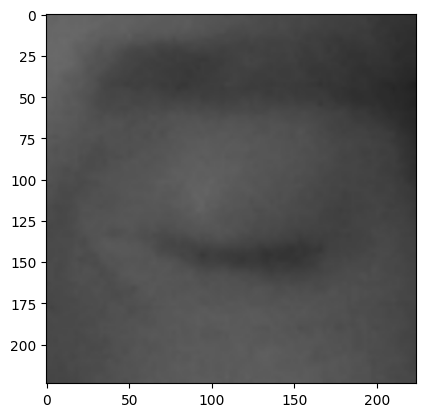

In [61]:
plt.imshow(new_array)

In [63]:
X_input = X_input/255.0

In [65]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


In [67]:
prediction

array([[-0.12163714]], dtype=float32)

# Lets check on unknown images

In [70]:
img = cv2.imread("C:/Users/vinay/Downloads/sad_women.jpg")

In [72]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [74]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [76]:
eyes = eye_cascade.detectMultiScale(img, 1.1, 4)

In [78]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255, 0), 2)

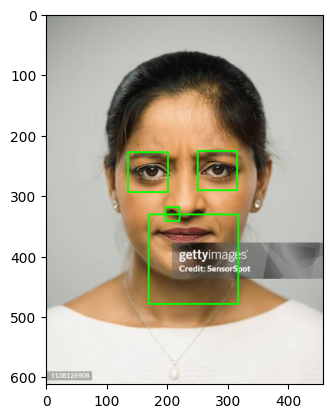

In [80]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping the eye image

In [83]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) == 0:
        print("Eyes not detected")
    else:
        for (ex, ey, ew, eh) in eyes:
            eyes_roi = roi_color[ey:ey+eh, ex: ex+ew]

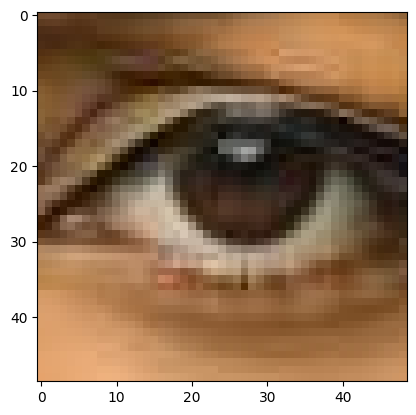

In [85]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [87]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [89]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[2.60923]], dtype=float32)

# Realtime video Demo
# First Detect that eyes are closed or open

In [92]:
import winsound
frequency = 2500
duration = 2000
import numpy as np
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
counter = 0
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255, 0), 2)
        eyess =  eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes not Detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi  = roi_color[ey: ey+eh, ex: ex+ew]

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    #draw a rectangle around face
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX

    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image / 255.0

    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame, status, (150,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        x1, y1, w1, h1 = 0,0, 175, 75

        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add Text
        cv2.putText(frame, 'Active', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)
    else:
        counter = counter+1
        status = "Closed Eyes"
        cv2.putText(frame, status, (150,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)
        if counter > 5:
            x1, y1, w1, h1 = 0,0, 175, 75
            cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
            cv2.putText(frame, 'Sleep Alert !!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)
            winsound.Beep(frequency, duration)
            counter = 0
    cv2.imshow("Drowsiness Detection", frame)

    if cv2.waitKey(2) & 0xFF == ord('d'):
        break

cap.release()
cv2.destroyAllWindows()

Eyes not Detected
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Eyes not Detected
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Eyes not Detected
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Eyes not Detected
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37